# Final Project Submission

Please fill out:
* Student name: Thiago Bassi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [16]:
# Your code here - remember to use markdown cells for comments as well!

In [545]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns
from copy import deepcopy

In [546]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [547]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [548]:
#creating the queries movies
qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #

In [549]:
#upload the tables with data movies
tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)

In [550]:
#creating the queries person
qr_persons = 'SELECT * FROM persons' # DONE
qr_directors = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM directors A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #
qr_writers = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM writers A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id'
qr_known_for = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM known_for A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE
qr_principals = 'SELECT A.movie_id, A.person_id, A.category, A.job, A.characters, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM principals A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE

In [551]:
#upload the tables with data person
tb_persons = pd.read_sql(qr_persons,con)
tb_directors = pd.read_sql(qr_directors,con)
tb_writers = pd.read_sql(qr_writers,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)

In [8]:
#spliting genres at persons table
tb_writers['genres_split'] = tb_writers['genres'].str.split(",")
tb_directors['genres_split'] = tb_directors['genres'].str.split(",")
tb_principals['genres_split'] = tb_principals['genres'].str.split(",")
tb_known_for['genres_split'] = tb_known_for['genres'].str.split(",")

In [552]:
#spliting primary pofession at persons table
tb_writers['primary_profession_split'] = tb_writers['primary_profession'].str.split(",")
tb_directors['primary_profession_split'] = tb_directors['primary_profession'].str.split(",")
tb_principals['primary_profession_split'] = tb_principals['primary_profession'].str.split(",")
tb_known_for['primary_profession_split'] = tb_known_for['primary_profession'].str.split(",")

In [553]:
#spliting genres at movies table
tb_movie_akas['genres_split'] = tb_movie_akas['genres'].str.split(",")
tb_movie_basics['genres_split'] = tb_movie_basics['genres'].str.split(",")

In [554]:
# separating only the movies that are the principal name in people
tb_writers_tot = deepcopy(tb_writers[tb_writers['is_original_title'] == 1])
tb_directors_tot = deepcopy(tb_directors[tb_directors['is_original_title'] == 1])
tb_principals_tot = deepcopy(tb_principals[tb_principals['is_original_title'] == 1])
tb_known_for_tot = deepcopy(tb_known_for[tb_known_for['is_original_title'] == 1])

In [555]:
# separating only the movies that are the principal name in movies
tb_movie_akas_tot = deepcopy(tb_movie_akas[tb_movie_akas['is_original_title'] == 1])
tb_movie_basics_tot = deepcopy(tb_movie_basics[tb_movie_basics['is_original_title'] == 1])

In [556]:
## Removing movies before 2010
#convert to datetime
tb_movie_basics_tot['year'] = tb_movie_basics_tot['start_year'].astype(int)
tb_movie_akas_tot['year'] = pd.to_datetime(tb_movie_akas_tot['start_year']).astype(int)
tb_known_for_tot['year'] = pd.to_datetime(tb_known_for_tot['start_year']).astype(int)
tb_principals_tot['year'] = pd.to_datetime(tb_principals_tot['start_year']).astype(int)
tb_directors_tot['year'] = pd.to_datetime(tb_directors_tot['start_year']).astype(int)
tb_writers_tot['year'] = pd.to_datetime(tb_writers_tot['start_year']).astype(int)

#CSV s values 

In [557]:
#Step 1
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.strip('$'))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))

In [558]:
#STEP 2
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: float(x.replace(",", "")))

In [559]:
##New Columns for Profit information
#domestic_profiit
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

In [560]:
#total_profit
tn_movie_budgets['total_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

In [561]:
#roi
tn_movie_budgets['roi'] = (tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget']

In [562]:
## Removing movies before 2010
#convert to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
#set index to datetime
tn_movie_budgets.set_index('release_date', inplace=True)

In [563]:
#slice out our timeframe
recent_movie_budgets = deepcopy(tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022'])
recent_movie_budgets.reset_index(inplace = True)

In [564]:
recent_movie_budgets['year'] = recent_movie_budgets['release_date'].dt.year

In [565]:
tb_movie_basics_tot.reset_index(inplace = True)

In [566]:
production_budget_per = np.percentile(recent_movie_budgets['production_budget'],[0,25,50,75,100])
domestic_gross_per = np.percentile(recent_movie_budgets['domestic_gross'],[0,25,50,75,100])
worldwide_gross_per = np.percentile(recent_movie_budgets['worldwide_gross'],[0,25,50,75,100])
domestic_profit_per = np.percentile(recent_movie_budgets['domestic_profit'],[0,25,50,75,100])
total_profit_per = np.percentile(recent_movie_budgets['total_profit'],[0,25,50,75,100])
roi_per = np.percentile(recent_movie_budgets['roi'],[0,25,50,75,100])

In [567]:
recent_movie_budgets['production_budget_cat'] = pd.qcut(recent_movie_budgets['production_budget'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['domestic_gross_cat'] = pd.qcut(recent_movie_budgets['domestic_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['worldwide_gross_cat'] = pd.qcut(recent_movie_budgets['worldwide_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['domestic_profit_cat'] = pd.qcut(recent_movie_budgets['domestic_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['total_profit_cat'] = pd.qcut(recent_movie_budgets['total_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['roi_cat'] = pd.qcut(recent_movie_budgets['roi'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])

In [568]:
recent_movie_budgets['production_budget_cat'] = pd.qcut(recent_movie_budgets['production_budget'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
recent_movie_budgets['domestic_gross_cat'] = pd.qcut(recent_movie_budgets['domestic_gross'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
recent_movie_budgets['worldwide_gross_cat'] = pd.qcut(recent_movie_budgets['worldwide_gross'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
recent_movie_budgets['domestic_profit_cat'] = pd.qcut(recent_movie_budgets['domestic_profit'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
recent_movie_budgets['total_profit_cat'] = pd.qcut(recent_movie_budgets['total_profit'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
recent_movie_budgets['roi_cat'] = pd.qcut(recent_movie_budgets['roi'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])

In [569]:
movie_base = tb_movie_basics_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0], left_on=['title','year'],right_on=['movie','year'], how = 'inner')

In [570]:
movie_base_aka = tb_movie_akas_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0], left_on=['title','year'],right_on=['movie','year'], how = 'inner')

In [571]:
directors_movie = tb_directors_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
known_for_movie = tb_known_for_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
aka_movie = tb_movie_akas_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
principals_movie = tb_principals_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
writers_movie = tb_writers_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')

In [572]:
directors_movie = movie_base.merge(tb_directors_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
known_for_movie = movie_base.merge(tb_known_for_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
aka_movie = movie_base.merge(tb_movie_akas_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
principals_movie = movie_base.merge(tb_principals_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
writers_movie = movie_base.merge(tb_writers_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')

That its it

            EXPLODE LATER

In [573]:
# separating the genres and primary at person table
writers_movie_ex = writers_movie.explode('genres_split')
directors_movie_ex = directors_movie.explode('genres_split')
principals_movie_ex = principals_movie.explode('genres_split')
known_for_movie_ex = known_for_movie.explode('genres_split')
writers_movie_ex = writers_movie_ex.explode('primary_profession_split')
directors_movie_ex = directors_movie_ex.explode('primary_profession_split')
principals_movie_ex = principals_movie_ex.explode('primary_profession_split')
known_for_movie_ex = known_for_movie_ex.explode('primary_profession_split')

In [575]:
# separating the genres and primary at movies table
aka_movie_ex = movie_base_aka.explode('genres_split')
movie_base_ex = movie_base.explode('genres_split')

From here creating the grafic

In [726]:
tb_genres_rates = aka_movie_ex[aka_movie_ex['is_original_title']==1][['genres_split','averagerating','numvotes','movie_id','title']]

In [725]:
num_head = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).head(4).index)
num_tail = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).tail(3).index)
order_gen_num = num_head + num_tail
order_gen_num.pop(1)


'Western'

In [640]:
ave_head = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).head(3).index)
ave_tail = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).tail(3).index)
order_gen_ave = ave_head + ave_tail
order_gen_ave

['Biography', 'Sport', 'History', 'Thriller', 'Fantasy', 'Horror']

In [ ]:
#movie_top_bot['genres_split'].astype('O')
#movie_top_bot['genres_split'].astype('category')

In [729]:
#movies = aka_movie_ex[['movie_id','title','start_year','averagerating','numvotes','genres_split','production_budget','domestic_gross','worldwide_gross','domestic_profit','total_profit','roi','production_budget_cat','domestic_gross_cat','worldwide_gross_cat','domestic_profit_cat','total_profit_cat','roi_cat']]
movies = aka_movie_ex[['movie_id','title','start_year','averagerating','numvotes','genres_split','production_budget','total_profit','production_budget_cat','total_profit_cat']]
movie_top_bot = movies[movies['genres_split'].isin(order_gen_num)]

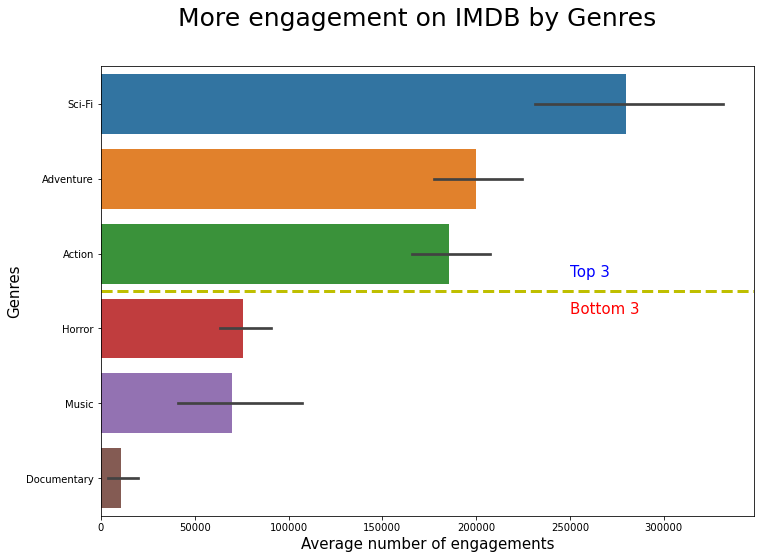

In [727]:
order = order_gen_num
x = 'numvotes'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig.suptitle('More engagement on IMDB by Genres', fontsize = 25, verticalalignment = 'top')

sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
ax.set_xlabel('Average number of engagements', fontsize = 15)
ax.set_ylabel('Genres', fontsize = 15)
ax.annotate('Top 3', xy = [250000,2.3], fontsize = 15, c = 'b')
ax.annotate('Bottom 3', xy = [250000,2.8], fontsize = 15, c = 'r')
ax.annotate
ax.axhline(y =2.5, c ='y', linewidth = 3, linestyle = '--')



plt.show()

In [603]:
movie_top_bot.columns

Index(['movie_id', 'title', 'start_year', 'averagerating', 'numvotes',
       'genres_split', 'production_budget', 'total_profit',
       'production_budget_cat', 'total_profit_cat'],
      dtype='object')

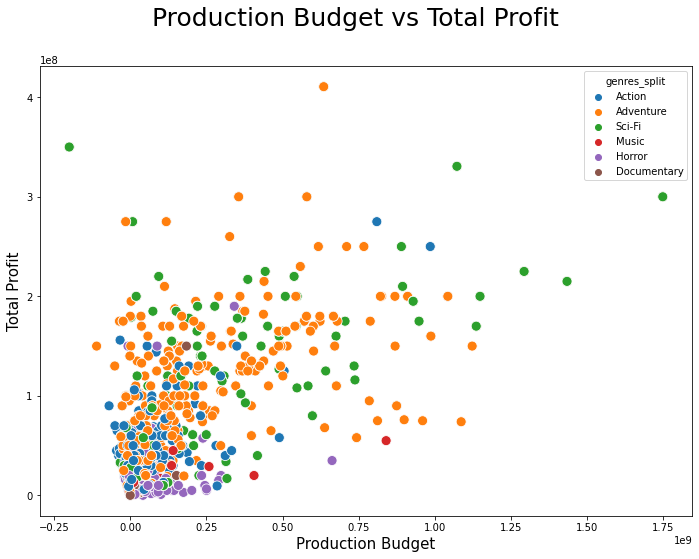

In [738]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(x = 'total_profit', y = 'production_budget', 
                s = 100, hue = 'genres_split', data = movie_top_bot)
ax.set_xlabel('Production Budget', fontsize = 15)
ax.set_ylabel('Total Profit', fontsize = 15)
fig.suptitle('Production Budget vs Total Profit', fontsize = 25, verticalalignment = 'top')
plt.show()

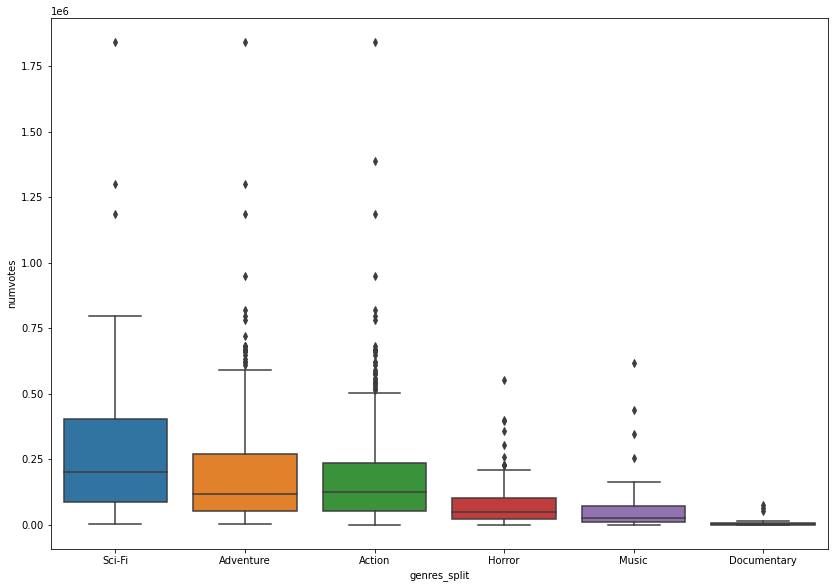

In [731]:
#tb_movie_akas[tb_movie_akas.runtime_minutes == tb_movie_akas.runtime_minutes.max()]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = 'genres_split', y = 'numvotes', data = movie_top_bot, orient = 'v', order = order)
plt.tight_layout()

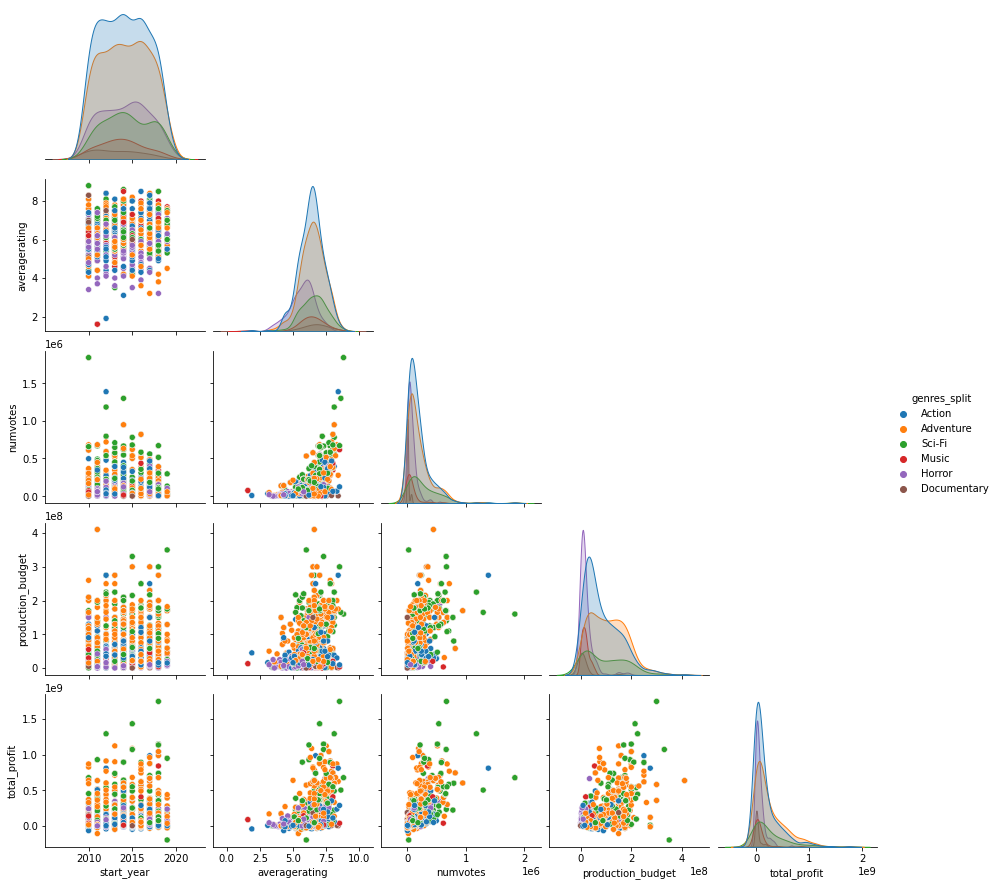

In [732]:
sns.pairplot(movie_top_bot, corner = True, hue = 'genres_split')
plt.show()

In [733]:
%%capture histhistpair
sns.pairplot(movie_top_bot, hue = 'genres_split', diag_kind= "hist", kind = "hist", 
             diag_kws = {'element': 'step'}, plot_kws = {'bins': 15}, corner = True)
plt.show()

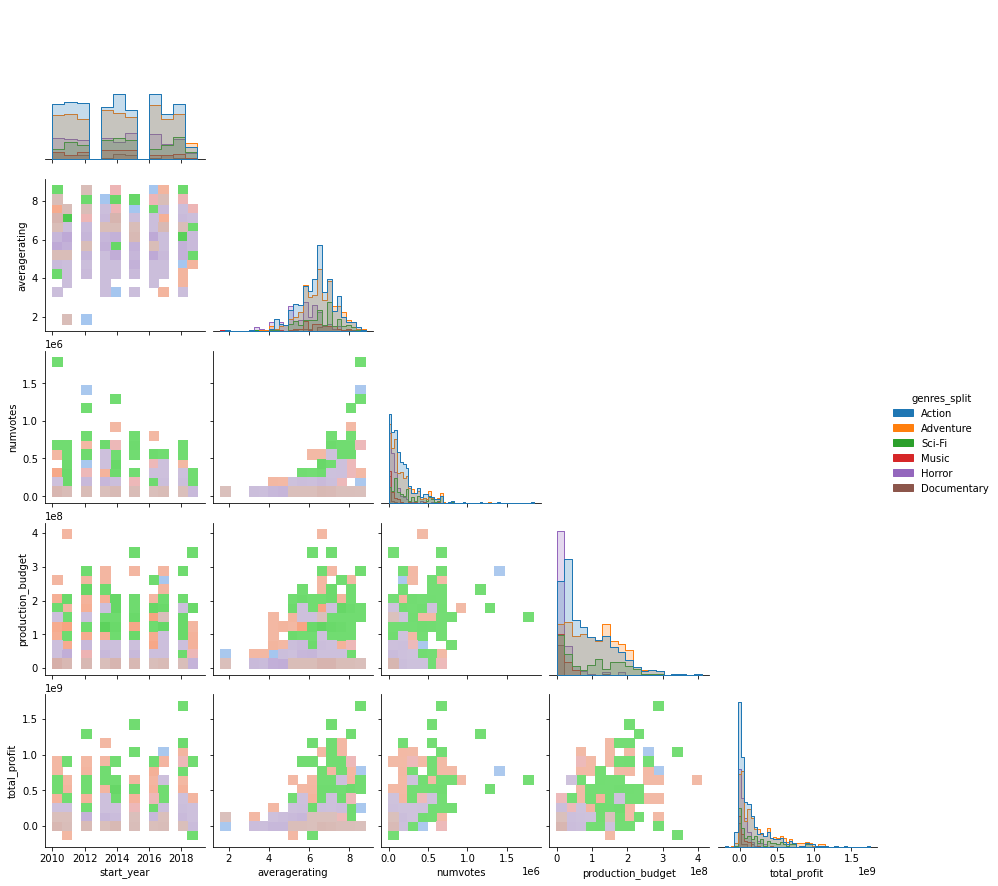

In [734]:
histhistpair()

In [536]:
movie_top_bot['production_budget_cat'].astype('O')
m_cat1=movie_top_bot[movie_top_bot['production_budget_cat']=='cat1']
m_cat2=movie_top_bot[movie_top_bot['production_budget_cat']=='cat2']
m_cat3=movie_top_bot[movie_top_bot['production_budget_cat']=='cat3']
m_cat4=movie_top_bot[movie_top_bot['production_budget_cat']=='cat4']
m_cat5=movie_top_bot[movie_top_bot['production_budget_cat']=='cat5']
m_cat1['production_budget_cat']  = m_cat1['production_budget_cat'].astype('O')
m_cat1['production_budget_cat']  = m_cat1['production_budget_cat'].astype('category')
m_cat2['production_budget_cat'].astype('O')
m_cat2['production_budget_cat'].astype('category')
m_cat3['production_budget_cat'].astype('O')
m_cat3['production_budget_cat'].astype('category')
m_cat4['production_budget_cat'].astype('O')
m_cat4['production_budget_cat'].astype('category')
m_cat5['production_budget_cat'].astype('O')
m_cat5['production_budget_cat'].astype('category')

0       cat5
0       cat5
0       cat5
1       cat5
1       cat5
        ... 
1342    cat5
1344    cat5
1344    cat5
1344    cat5
1346    cat5
Name: production_budget_cat, Length: 659, dtype: category
Categories (5, object): ['cat1' < 'cat2' < 'cat3' < 'cat4' < 'cat5']

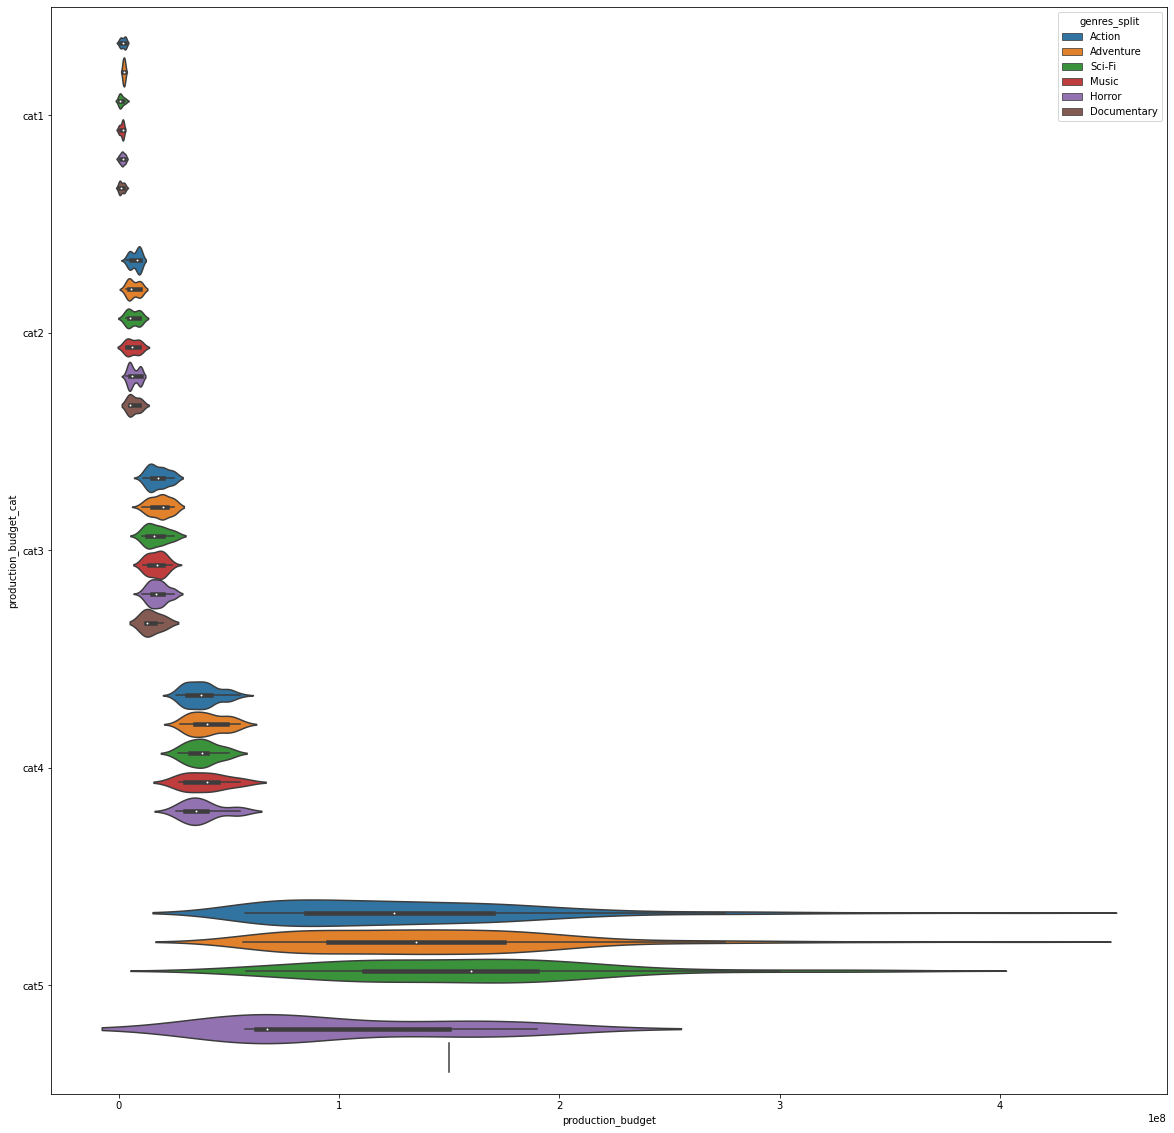

In [740]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.violinplot(x = 'production_budget', y = 'production_budget_cat',
               hue = 'genres_split', split = False, 
               data = movie_top_bot)
plt.show()

In [ ]:
sns.catplot(x = 'production_budget_cat', kind = 'count', row = 'total_profit_cat', col = 'genres_split', data = movie_top_bot)
plt.show()